In [1]:
%matplotlib inline
import numpy as np
import lmfit
import matplotlib.pyplot as plt
import pandas as pd
import corner
import astropy
import astropy.units as u

In [2]:
from astropy import constants as const

In [3]:
H0=70.* u.km / u.s / u.Mpc
c=const.c.to('km/s')
a=c/H0
a1=a.value

In [4]:
zz= np.random.uniform(0.01, 10., n)
e=np.random.normal(0.1,0.5, n)
#(Vigoureux):
m=25+5*np.log10(a1)+5*np.log10((zz+1)*np.log(zz+1))+e
#m=a1*np.log(z+1)+e
#the best-fit function to represent the observational z/extinction-corrected distance moduli (μ) data set(Marosi):
#m=44.109*zz**(0.0598)+e
#m=a1*(((zz+1)**2) -1)/(((zz+1)**2) +1) + e
#m=2*a1*(1-(1+zz)**(-1/2))+e

In [5]:
print zz

[6.92487165 1.8160658  3.20369968 ... 0.79202046 0.25790765 6.89703023]


In [6]:
print m

[49.31901422 46.09195189 46.77269064 ... 42.56801792 40.30241786
 50.26553534]


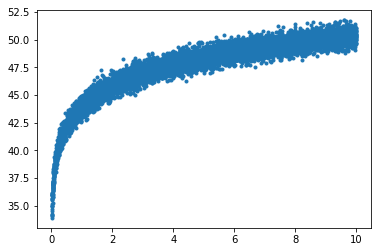

In [7]:
plt.plot(zz, m, '.')

In [8]:
dat= {'zz':np.random.uniform(0., 1., n),
      'e':np.random.normal(0.2,0.1, n),
      'm':44.109*zz**(0.0598)+e }
df = pd.DataFrame(data=dat)

In [9]:
data=np.sort(df.T, axis=0)
zs = df.zz
mm = df.m
dm = df.e

In [10]:
from astropy.cosmology import wCDM

In [11]:
def w(z) :
    wz=w0
    return wz

In [12]:
def DM(z,H0,Om,Ode,w):
    cosmo = wCDM(H0=H0* u.km / u.s / u.Mpc, Om0=Om,Ode0=Ode,w0=w)
    DL=cosmo.luminosity_distance(z)
    mag=5*np.log10((DL/(10*u.pc)).decompose())
    return mag

In [13]:
p = lmfit.Parameters()
p.add_many(('Om',0.3,True,0.,2.),('H0',70.0,True,50.,100.),('Ode',0.7,True,0.,2.),('w',-1.0,True,-2.,2.))

def residual(p):
    v = p.valuesdict()
    return (DM(zs,v['H0'],v['Om'],v['Ode'],v['w'])-mm)/dm

In [14]:
mi = lmfit.minimize(residual, p, method='nelder', nan_policy='omit')

/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:2048: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 350
    # data points      = 1452
    # variables        = 4
    chi-square         = 5.6341e+08
    reduced chi-square = 389097.463
    Akaike info crit   = 18693.5361
    Bayesian info crit = 18714.6589
[[Variables]]
    Om:   2.3603e-13 (init = 0.3)
    H0:   50.0000000 (init = 70)
    Ode:  2.00000000 (init = 0.7)
    w:   -2.00000000 (init = -1)


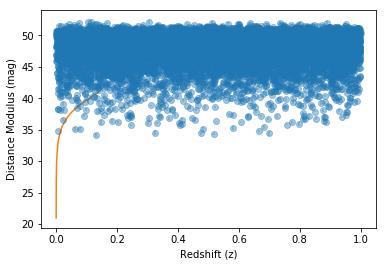

In [15]:
s = (zs.sort_values()).index
plt.errorbar(zs[s],mm[s],yerr=dm[s],fmt='o',alpha=0.4)
bestOm = mi.params.valuesdict()['Om']
bestH0 = mi.params.valuesdict()['H0']
bestOde= mi.params.valuesdict()['Ode']
bestw0 = mi.params.valuesdict()['w']
plt.plot(zs[s],DM(zs[s],bestH0,bestOm,bestOde,bestw0))
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mag)')
lmfit.report_fit(mi)

In [ ]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

/home/alexandra/.local/lib/python2.7/site-packages/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in log10
  *arrays, **kwargs)


emcee: Exception while calling your likelihood function:
  params: [ 0.12552843 50.55519926  1.96273903 -1.95837871]
  args: (<function residual at 0x7fece8979d70>, Parameters([('Om', <Parameter 'Om', 0.12552843497840246, bounds=[0.0:2.0]>), ('H0', <Parameter 'H0', 50.555199264206486, bounds=[50.0:100.0]>), ('Ode', <Parameter 'Ode', 1.9627390314638278, bounds=[0.0:2.0]>), ('w', <Parameter 'w', -1.958378706594321, bounds=[-2.0:2.0]>)]), ['Om', 'H0', 'Ode', 'w'], array([[  0.,   2.],
       [ 50., 100.],
       [  0.,   2.],
       [ -2.,   2.]]))
  kwargs: {'nan_policy': 'omit', 'userkws': {}, 'userargs': [], 'is_weighted': True, 'float_behavior': 'posterior'}
  exception:


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/alexandra/.local/lib/python2.7/site-packages/lmfit/minimizer.py", line 2015, in _lnpost
    out = userfcn(params, *userargs, **userkwargs)
  File "<ipython-input-13-e971801e6574>", line 6, in residual
    return (DM(zs,v['H0'],v['Om'],v['Ode'],v['w'])-mm)/dm
  File "<ipython-input-12-06716df00e22>", line 3, in DM
    DL=cosmo.luminosity_distance(z)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 1288, in luminosity_distance
    return (1. + z) * self.comoving_transverse_distance(z)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 1194, in comoving_transverse_distance
    return self._comoving_transverse_distance_z1z2(0, z)
  File "/home/alexandra/.local/lib/python2.7/site-packages/astropy/cosmology/core.py", line 1223

KeyboardInterrupt: 

In [ ]:
corner.corner(res.flatchain,labels=mi.var_names, truths=list(mi.params.valuesdict().values()))